# ATP Tennis Data - Player Diff Stats + One Hot Encoding (All Categorical Data)


In our previous [notebook](https://github.com/sv650s/sb-capstone2/blob/master/notebooks/5.1-atp_diff-ohe_player.ipynb), we saw that Decision Tree is still the best algorithm when we used the data set where we used player diff stats but we one hot encoded player id

In this notebook, we will run the same algorithms but we will one hot encode all categorical data - ie, tournament id, surface

### Results from Decision Tree Classifier with player diff dataset:

```
Model Score: 0.9372638963842418

              precision    recall  f1-score   support

        Loss       0.93      0.94      0.94      7378
         Win       0.94      0.93      0.94      7446

    accuracy                           0.94     14824
   macro avg       0.94      0.94      0.94     14824
weighted avg       0.94      0.94      0.94     14824
```

# Summary of Results

* Decision Tree is still our best model at around 93.6% accuracy. There is a slight decrease in precicision for lost matches - the difference is probably negligible
```
Model Score: 0.9361171073934161

              precision    recall  f1-score   support

        Loss       0.93      0.94      0.94      7378
         Win       0.94      0.94      0.94      7446

    accuracy                           0.94     14824
   macro avg       0.94      0.94      0.94     14824
weighted avg       0.94      0.94      0.94     14824
```


* no significant improvement in Decision Tree, Ada Boost, Grandient Boost, Logistic Regression, or Random Forest
* We did see another jump in improvment for KNN when we encoded the rest of the categorical columns (~5%)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-{DESCRIPTION}.csv'

START_YEAR = 1998
END_YEAR = 2019

MODEL_TEMPLATE_NAME = f'{START_YEAR}-{END_YEAR}-{DESCRIPTION}.pkl'

LABEL_COL = 'p1_winner'

# random seed
RSTATE = 1
N_JOBS = 4
MAX_ITER = 100



ModelWrapper.init(description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR, 
                 model_file_format = MODEL_TEMPLATE_NAME)

In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR)

(59293, 5251)


# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_lr = lr.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6683081489476524

              precision    recall  f1-score   support

        Loss       0.67      0.66      0.67      7378
         Win       0.67      0.67      0.67      7446

    accuracy                           0.67     14824
   macro avg       0.67      0.67      0.67     14824
weighted avg       0.67      0.67      0.67     14824

      Loss   Win
Loss  4904  2474
Win   2443  5003


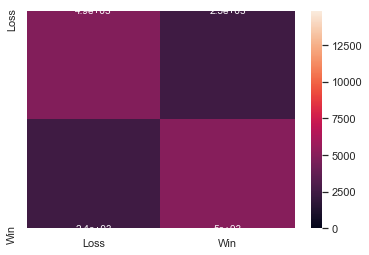

In [4]:
lr.analyze()

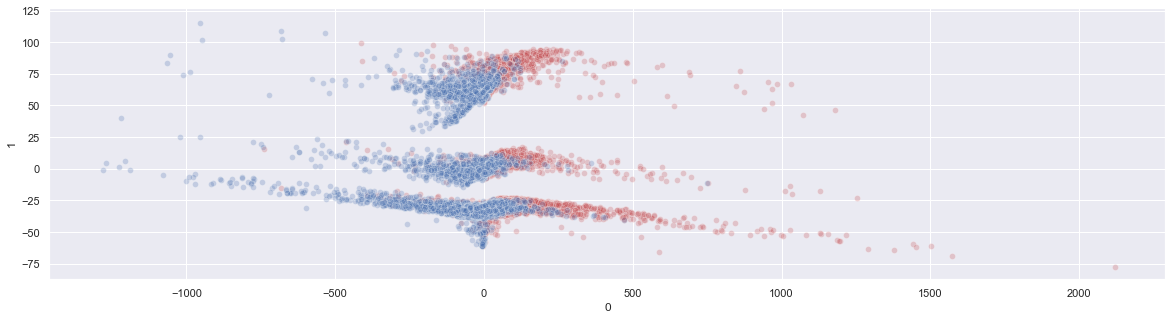

In [5]:
ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.8421478683216406

              precision    recall  f1-score   support

        Loss       0.83      0.86      0.84      7378
         Win       0.85      0.83      0.84      7446

    accuracy                           0.84     14824
   macro avg       0.84      0.84      0.84     14824
weighted avg       0.84      0.84      0.84     14824

      Loss   Win
Loss  6311  1067
Win   1273  6173


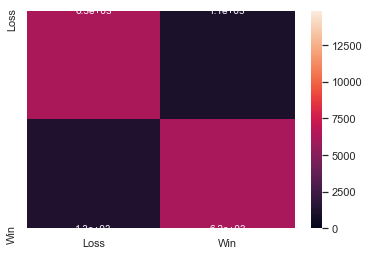

In [8]:
knn.analyze()

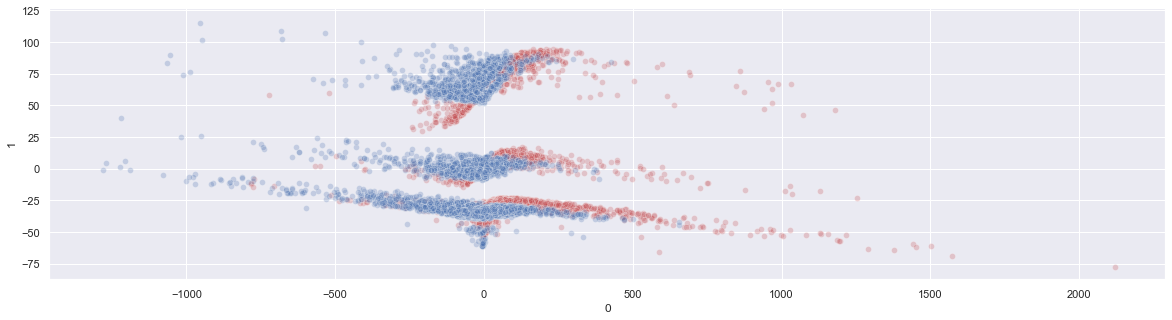

In [9]:
ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.9361171073934161

              precision    recall  f1-score   support

        Loss       0.93      0.94      0.94      7378
         Win       0.94      0.94      0.94      7446

    accuracy                           0.94     14824
   macro avg       0.94      0.94      0.94     14824
weighted avg       0.94      0.94      0.94     14824

      Loss   Win
Loss  6913   465
Win    482  6964


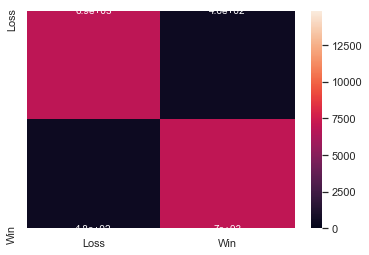

In [12]:
dt.analyze()

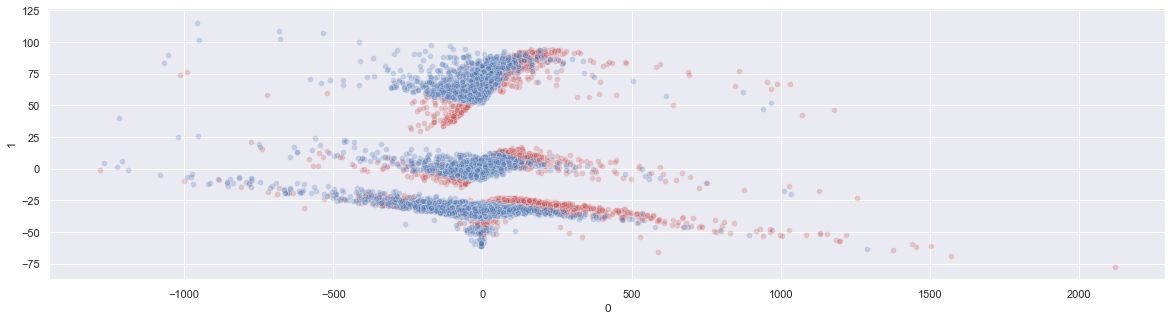

In [13]:
ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_rf = rf.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.7945223961144091

              precision    recall  f1-score   support

        Loss       0.77      0.84      0.80      7378
         Win       0.82      0.75      0.79      7446

    accuracy                           0.79     14824
   macro avg       0.80      0.79      0.79     14824
weighted avg       0.80      0.79      0.79     14824

      Loss   Win
Loss  6167  1211
Win   1835  5611


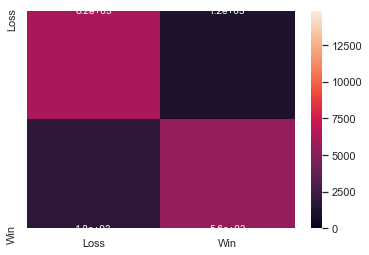

In [16]:
rf.analyze()

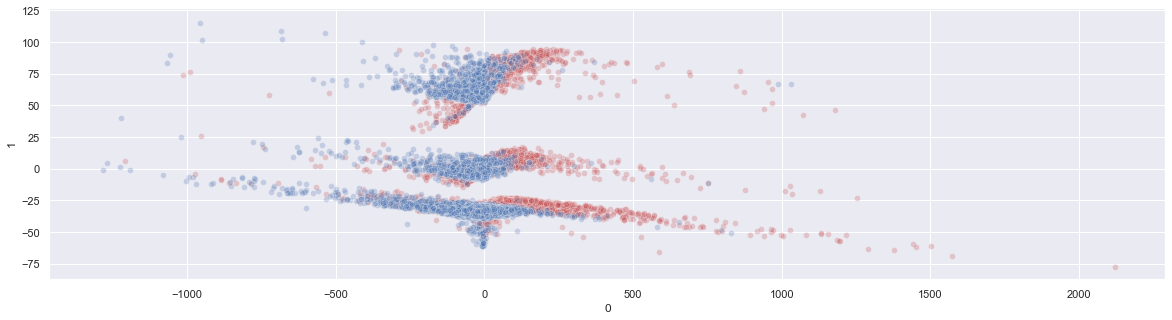

In [17]:
ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3153            9.40m
         2           1.2572            9.33m
         3           1.2087            9.19m
         4           1.1699            9.10m
         5           1.1376            9.03m
         6           1.1111            8.94m
         7           1.0795            8.87m
         8           1.0528            8.79m
         9           1.0318            8.67m
        10           1.0104            8.56m
        20           0.8858            7.71m
        30           0.8207            6.65m
        40           0.7857            5.63m
        50           0.7618            4.63m
        60           0.7462            3.72m
        70           0.7205            2.80m
        80           0.7034            1.86m
        90           0.6820           55.69s
       100           0.6700            0.00s


Model Score: 0.8559093362115489

              precision    recall  f1-score   support

        Loss       0.84      0.87      0.86      7378
         Win       0.87      0.84      0.85      7446

    accuracy                           0.86     14824
   macro avg       0.86      0.86      0.86     14824
weighted avg       0.86      0.86      0.86     14824

      Loss   Win
Loss  6452   926
Win   1210  6236


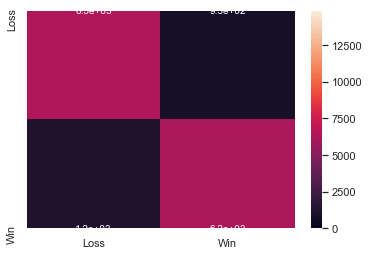

In [20]:
gb.analyze()

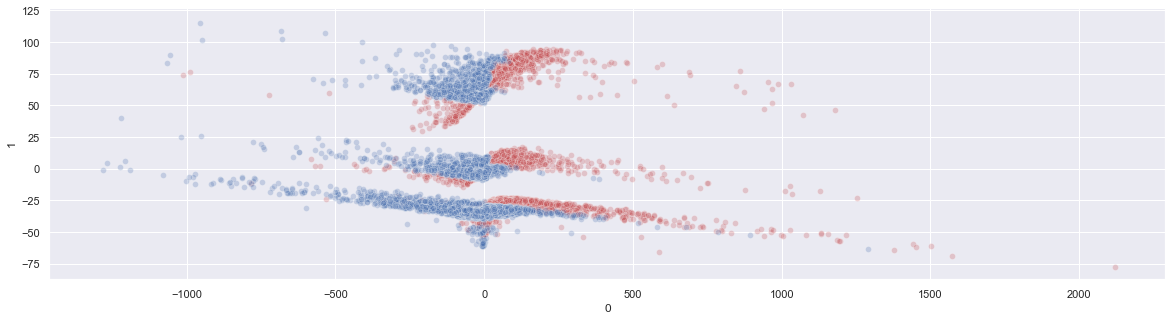

In [21]:
ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7558014031300594

              precision    recall  f1-score   support

        Loss       0.74      0.79      0.76      7378
         Win       0.78      0.72      0.75      7446

    accuracy                           0.76     14824
   macro avg       0.76      0.76      0.76     14824
weighted avg       0.76      0.76      0.76     14824

      Loss   Win
Loss  5822  1556
Win   2064  5382


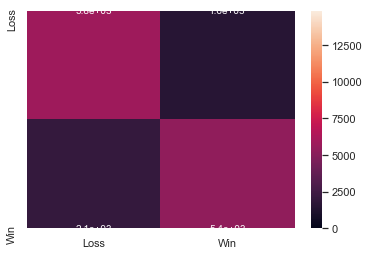

In [24]:
ab.analyze()

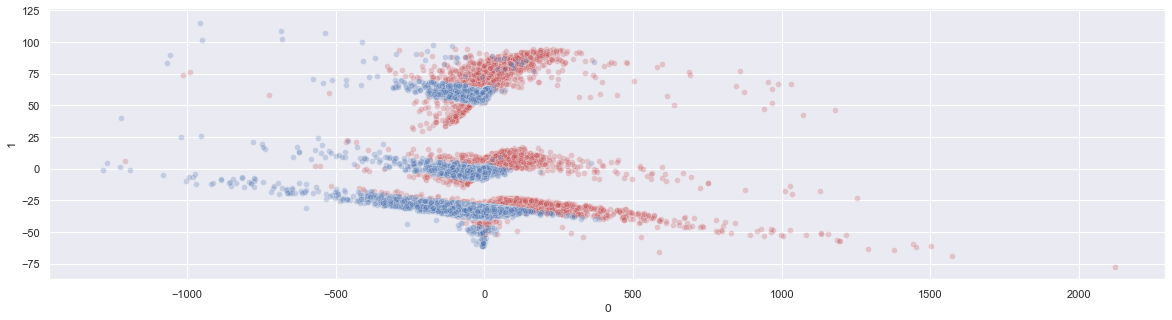

In [25]:
ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

# Results

* Decision Tree is still our best model
* no significant improvement in Decision Tree, Ada Boost, Grandient Boost, Logistic Regression, or Random Forest
* We did see another jump in improvment for KNN when we encoded the rest of the categorical columns (~5%)

In [29]:
report = pd.read_csv(ModelWrapper.report_file)
report.tail(5)

,model,description,data_file,start_year,accuracy,confusion_matrix,classification_report,model_file
13,KNeighborsClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,0.842148,"{""0"": {""0"": 6311, ""1"": 1273}, ""1"": {""0"": 1067,...","{""Loss"": {""precision"": 0.8321466244725738, ""re...",../models/kneighborsclassifier-1998-2019-diff-...
14,DecisionTreeClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,0.936117,"{""0"": {""0"": 6913, ""1"": 482}, ""1"": {""0"": 465, ""...","{""Loss"": {""precision"": 0.9348208248816768, ""re...",../models/decisiontreeclassifier-1998-2019-dif...
15,RandomForestClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,0.794522,"{""0"": {""0"": 6167, ""1"": 1835}, ""1"": {""0"": 1211,...","{""Loss"": {""precision"": 0.7706823294176456, ""re...",../models/randomforestclassifier-1998-2019-dif...
16,GradientBoostingClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,0.855909,"{""0"": {""0"": 6452, ""1"": 1210}, ""1"": {""0"": 926, ...","{""Loss"": {""precision"": 0.8420777864787262, ""re...",../models/gradientboostingclassifier-1998-2019...
17,AdaBoostClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,0.755801,"{""0"": {""0"": 5822, ""1"": 2064}, ""1"": {""0"": 1556,...","{""Loss"": {""precision"": 0.7382703525234593, ""re...",../models/adaboostclassifier-1998-2019-diff-oh...


Text(0.5, 1.0, 'Model Accuracy')

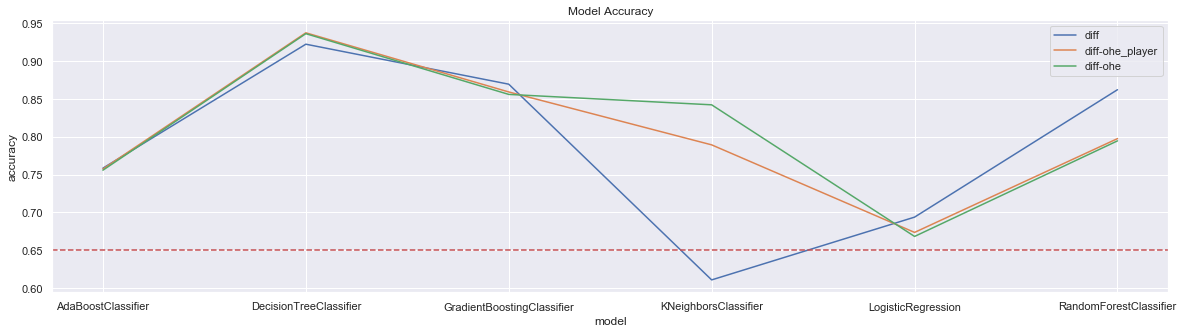

In [30]:
f, a = plt.subplots(1, 1, figsize=(20, 5))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    sns.lineplot(x="model", y="accuracy", data=report_desc, label=desc)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")